In [1]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = os.getcwd()
# go one level higher and add it to path
parent_dir = str(Path(dir).parents[0])
sys.path.append(parent_dir)

from src.config import AUDIO_DIR
from src.data.data_utils import load
from src.features.features import get_features

pd.set_option('display.max_columns', 52)

## Data preparation

In [2]:
try:
    features = pd.read_csv('../data/interim/features.csv', index_col=0, header=[0, 1, 2])
except:
    get_features('small')


In [3]:
features = features.dropna()
features.shape

(7951, 518)

In [4]:
features

feature    chroma_cens                                                     \
statistics    kurtosis                                                      
number              01        02        03        04        05         06   
track_id                                                                    
2            -0.217359 -0.726509 -0.491446 -0.721771 -0.545604   0.903521   
5            -0.575293 -0.460787 -1.310206 -0.371414 -0.279014  -0.456130   
10           -0.170648 -0.662701  0.334679 -0.269012 -0.633766  -0.800806   
140          -0.286780  1.582875  0.664635  0.370429 -0.525093  -1.094748   
141           0.337887 -0.320074 -0.225522 -0.831719 -0.411882  -1.212733   
...                ...       ...       ...       ...       ...        ...   
154308       -1.053601  0.060788  1.704757 -0.777857  0.558388  -0.662202   
154309        2.169788 -1.155132 -0.303650 -1.045133 -1.208173  -0.825725   
154413       -1.219351 -1.417390  0.208791  4.801033 -0.561867   3.271480   
154414       -0.239980 -0.642887  1.149441 -0.793276 -1.293259  -1.022434   
155066        1.009953 -0.091882 -1.310494 -1.732816 -1.094380  20.023039   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.786983  0.917156 -0.793144  0.452647 -0.229356 -0.173608   
5          -0.788048  0.126617 -0.816839  3.057143  0.065180  2.229395   
10         -0.514046 -0.019774 -0.477296 -0.710341 -0.347353 -0.336416   
140         0.839174 -0.202234 -0.432132 -1.217938 -0.682920 -0.605614   
141        -0.553260 -0.743021  0.849655  0.155225 -0.050075  0.660437   
...              ...       ...       ...       ...       ...       ...   
154308     -1.358890 -0.714282 -1.047748  2.689562 -1.196743  2.795735   
154309     -0.481393  6.507251  0.381729  1.691741  2.469630  1.070482   
154413      5.800009  9.027393 -1.526886  1.665599 -0.886765  3.377588   
154414     -1.177673  1.347859 -0.231648 -0.943169 -0.604957  1.652884   
155066      9.381350  0.520161 -0.901654  0.246841  0.411799  5.859467   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.731929  0.564340  0.509567  0.539360  0.799817  0.504063   
5           0.503388  0.507648  0.693599  0.569417  0.537767  0.622475   
10          0.413630  0.472618  0.667295  0.654727  0.442657  0.415954   
140         0.521293  0.862354  0.590986  0.683515  0.608712  0.654876   
141         0.519412  0.429041  0.616609  0.877509  0.498666  0.873961   
...              ...       ...       ...       ...       ...       ...   
154308      0.458248  0.612681  0.972323  1.000000  0.859181  0.566026   
154309      0.824763  0.821103  0.886571  0.476689  0.514607  0.658231   
154413      0.896096  0.882674  0.870927  0.940653  0.940773  0.888128   
154414      0.621285  0.680503  0.691272  0.731936  0.770049  0.721503   
155066      0.269397  0.969931  0.970135  0.861873  0.571166  0.728939   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.563302  0.427014  0.529112  0.422337  0.501536  0.506892   
5           0.526745  0.844188  0.546589  0.513516  0.325426  0.529823   
10          0.509747  0.336658  0.499810  0.456472  0.474244  0.352999   
140         0.740992  0.684725  0.793263  0.802711  0.814004  0.769616   
141         0.729198  0.654637

In [5]:
targets = pd.read_csv('../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1, 2]).loc[features.index, ('track', 'genre_top')]

In [6]:
targets.columns = ['genre']

In [7]:
targets

,genre
track_id,
2,Hip-Hop
5,Hip-Hop
10,Pop
140,Folk
141,Folk
...,...
154308,Hip-Hop
154309,Hip-Hop
154413,Pop


In [8]:
targets['genre'].value_counts()

genre
Folk             999
Pop              998
Rock             997
International    997
Hip-Hop          996
Instrumental     993
Electronic       991
Experimental     980
Name: count, dtype: int64

## Train-Val-Test split

In [9]:
split = pd.read_csv('../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1]).loc[features.index, ('set','split')]

In [10]:
split[split == 'training'].count(), split[split == 'validation'].count(), split[split == 'test'].count()

(6360, 793, 798)

In [11]:
X_train, y_train = features.loc[split[split == 'training'].index], targets.loc[split[split == 'training'].index]

In [12]:
X_val, y_val = features.loc[split[split == 'validation'].index], targets.loc[split[split == 'validation'].index]

In [13]:
X_test, y_test = features.loc[split[split == 'test'].index], targets.loc[split[split == 'test'].index]

## Models training

### Imports

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
import torch
import torch.nn as nn
import torch.optim as optim

### Logistic Regression

In [15]:
logreg_model = LogisticRegression(max_iter=100000, solver='newton-cholesky')

In [16]:
logreg_model.fit(X_train, y_train)

c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=100000, solver='newton-cholesky')

In [17]:
f1_logreg = f1_score(y_val, logreg_model.predict(X_val), average='macro')

In [18]:
accuracy_logreg = accuracy_score(y_val, logreg_model.predict(X_val))

In [19]:
print(f'Accuracy: {accuracy_logreg:.4f}')
print(f'F1: {f1_logreg:.4f}')

Accuracy: 0.5195
F1: 0.5049


### CatBoost Classifier

In [20]:
cb_model = CatBoostClassifier(iterations=1500, depth=8, learning_rate=0.02) #iterations=3000, depth=16, learning_rate=0.02, early_stopping_rounds=100

In [21]:
cb_model.fit(X_train, y_train, verbose=100)

0:	learn: 2.0649414	total: 2.38s	remaining: 59m 36s
100:	learn: 1.4461731	total: 3m 41s	remaining: 51m 2s
200:	learn: 1.2169925	total: 7m 19s	remaining: 47m 21s
300:	learn: 1.0681264	total: 10m 58s	remaining: 43m 44s
400:	learn: 0.9468096	total: 14m 28s	remaining: 39m 39s
500:	learn: 0.8455828	total: 17m 53s	remaining: 35m 40s
600:	learn: 0.7622498	total: 21m 19s	remaining: 31m 54s
700:	learn: 0.6889103	total: 24m 48s	remaining: 28m 16s
800:	learn: 0.6256531	total: 28m 18s	remaining: 24m 42s
900:	learn: 0.5727892	total: 31m 48s	remaining: 21m 8s
1000:	learn: 0.5246349	total: 35m 24s	remaining: 17m 39s
1100:	learn: 0.4821943	total: 38m 47s	remaining: 14m 3s
1200:	learn: 0.4446338	total: 42m 9s	remaining: 10m 29s
1300:	learn: 0.4135599	total: 45m 34s	remaining: 6m 58s
1400:	learn: 0.3847313	total: 49m 7s	remaining: 3m 28s
1499:	learn: 0.3577967	total: 52m 39s	remaining: 0us


In [22]:
f1_cb = f1_score(y_val, cb_model.predict(X_val), average='macro')

In [23]:
accuracy_cb = accuracy_score(y_val, cb_model.predict(X_val))

In [24]:
print(f'Accuracy: {accuracy_cb:.4f}')
print(f'F1: {f1_cb:.4f}')

Accuracy: 0.5851
F1: 0.5750


### CBoost result evaluation

In [25]:
flat_index = []

for idx in X_train.columns:
    flat = idx[0] + '_' + idx[1] + '_' + idx[2]
    flat_index.append(flat)

In [26]:
importances = pd.DataFrame({'feature_name': flat_index, 'rating': cb_model.feature_importances_}).sort_values(by='rating', ascending=False)

In [27]:
importances[importances['rating'] > 0.4].T

,272,275,430,398,314,352,435,273,294,394,336,516,436,353,455,377,428,393,255,396,252,375,143,511,334,464,427,445,403,448,248,277,405,438,413,292,437,461,465,397,458,444,312,408,460,354,332,412,373
feature_name,mfcc_max_01,mfcc_max_04,spectral_contrast_mean_04,rmse_std_01,mfcc_median_03,mfcc_skew_01,spectral_contrast_median_02,mfcc_max_02,mfcc_mean_03,rmse_mean_01,mfcc_min_05,zcr_skew_01,spectral_contrast_median_03,mfcc_skew_02,spectral_contrast_std_01,mfcc_std_06,spectral_contrast_mean_02,rmse_max_01,mfcc_kurtosis_04,rmse_min_01,mfcc_kurtosis_01,mfcc_std_04,chroma_cqt_min_12,zcr_kurtosis_01,mfcc_min_03,spectral_rolloff_mean_01,spectral_contrast_mean_01,spectral_contrast_min_05,spectral_bandwidth_min_01,spectral_contrast_skew_01,chroma_stft_std_09,mfcc_max_06,spectral_bandwidth_std_01,spectral_contrast_median_05,spectral_contrast_kurtosis_01,mfcc_mean_01,spectral_contrast_median_04,spectral_contrast_std_07,spectral_rolloff_median_01,rmse_skew_01,spectral_contrast_std_04,spectral_contrast_min_04,mfcc_median_01,spectral_centroid_mean_01,spectral_contrast_std_06,mfcc_skew_03,mfcc_min_01,spectral_centroid_std_01,mfcc_std_02
rating,1.732163,1.716636,1.015231,0.95915,0.866576,0.854103,0.82302,0.815677,0.777125,0.769972,0.764902,0.743998,0.713903,0.680065,0.628355,0.60867,0.59486,0.59025,0.589078,0.579542,0.578218,0.548309,0.547169,0.53517,0.531359,0.522777,0.51815,0.515169,0.513857,0.512469,0.477922,0.476387,0.474059,0.470899,0.469353,0.468695,0.460281,0.44788,0.4467,0.445634,0.442464,0.441057,0.437296,0.435722,0.431436,0.431086,0.415787,0.409774,0.403777


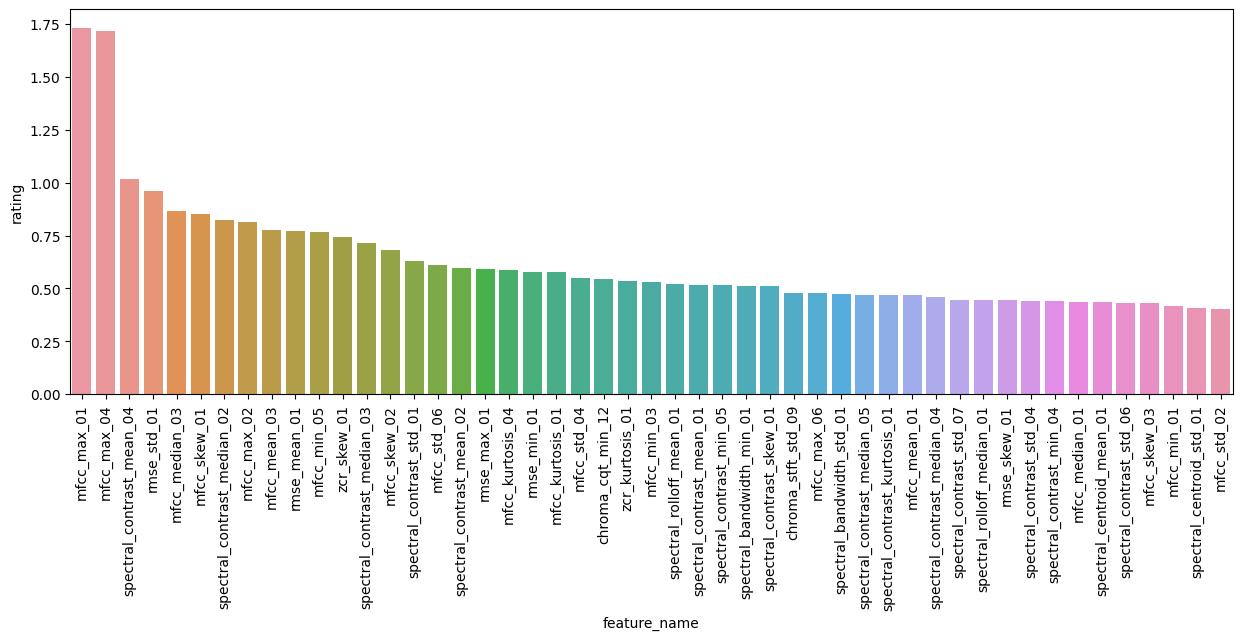

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(x=importances.loc[importances['rating'] > 0.4, 'feature_name'], y=importances.loc[importances['rating'] > 0.4, 'rating'])
plt.xticks(rotation=90);

### NeuralNetwork/PyTorch

In [65]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dims[2], hidden_dims[3])
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dims[3], output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.softmax(x)
        return x

In [66]:
input_dim = X_train.shape[1] 
hidden_dims = [512, 256, 128, 32]
output_dim = len(y_train['genre'].unique())

model = SimpleNN(input_dim, hidden_dims, output_dim)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)

In [72]:
num_epochs = 15000
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_encoded = label_encoder.transform(y_val)

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train.values, dtype=torch.float32)
    labels = torch.tensor(y_train_encoded, dtype=torch.long)
    
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    l2_reg = 0.0
    for param in model.parameters():
        l2_reg += torch.sum(param ** 2)
    loss += optimizer.param_groups[0]['weight_decay'] * l2_reg

    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        with torch.no_grad():
            model.eval()
            y_pred = model(X_val_tensor)
            y_pred_classes = torch.argmax(y_pred, dim=1).numpy()
            val_accuracy = accuracy_score(y_val_encoded, y_pred_classes)
            val_f1_score = f1_score(y_val_encoded, y_pred_classes, average='weighted')
            model.train()
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {val_accuracy}, F1: {val_f1_score}')


c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch [1/15000], Loss: 2.0071, Accuracy: 0.37957124842370743, F1: 0.3117137406335795
Epoch [101/15000], Loss: 1.9974, Accuracy: 0.38209331651954603, F1: 0.3130173264093974
Epoch [201/15000], Loss: 1.9894, Accuracy: 0.38209331651954603, F1: 0.3118249601141959
Epoch [301/15000], Loss: 1.9832, Accuracy: 0.3858764186633039, F1: 0.31449304707906545
Epoch [401/15000], Loss: 1.9771, Accuracy: 0.3871374527112232, F1: 0.3157810655231893
Epoch [501/15000], Loss: 1.9524, Accuracy: 0.4501891551071879, F1: 0.3862049668732
Epoch [601/15000], Loss: 1.9437, Accuracy: 0.45901639344262296, F1: 0.39498189664133754
Epoch [701/15000], Loss: 1.9376, Accuracy: 0.4552332912988651, F1: 0.3901482268027953
Epoch [801/15000], Loss: 1.9338, Accuracy: 0.45901639344262296, F1: 0.3954062365844528
Epoch [901/15000], Loss: 1.9295, Accuracy: 0.46153846153846156, F1: 0.398241219067046
Epoch [1001/15000], Loss: 1.9252, Accuracy: 0.46532156368221944, F1: 0.4009044668001152
Epoch [1101/15000], Loss: 1.9232, Accuracy: 0.4678

In [75]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)

y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

y_test_encoded = label_encoder.transform(y_test)
accuracy_nn = accuracy_score(y_test_encoded, y_pred_classes)
f1_nn = f1_score(y_test_encoded, y_pred_classes, average='macro')
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'F1: {f1_nn:.4f}')

Accuracy: 0.3734
F1: 0.3202


c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### Final results

In [76]:
results = pd.DataFrame({'Accuracy':[accuracy_logreg, accuracy_cb, accuracy_nn], 'F1':[f1_logreg, f1_cb, f1_nn]}, index=['logreg', 'cboost', 'neuralnet'])

In [77]:
results

,Accuracy,F1
logreg,0.519546,0.504910
cboost,0.585120,0.575010
neuralnet,0.373434,0.320154
